In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

In [2]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.colors import LogNorm

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
from scipy import signal
from scipy.signal import convolve
import scipy.fftpack
from scipy.fft import fft, ifft, fftfreq
from scipy.fftpack import rfft, irfft

from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client
from obspy import read
from obspy.core import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import obspy.signal
import math

import os
from os.path import join

<h1 style="text-align:center">Tarea 3</h1>
<h3 style="text-align:center">ACUS125: Análisis y aislamiento de vibraciones</h3>
<p style="text-align:center">Tomás Peñaloza <br>
<a href="mailto:corina.valderrama@alumnos.uach.cl">tomas.penaloza@alumnos.uach.cl</a><br>
<p style="text-align:center">Chiara Valderrama <br>
<a href="mailto:corina.valderrama@alumnos.uach.cl">corina.valderrama@alumnos.uach.cl</a><br>

# Introducción

Para la realización de este trabajo se nos entregó la información de un sismo recibida por distintas estaciones. Los información de cada una de las estaciones fueron analizadas del eje z y para ello se leyó la metadata. De esta se extrajeron los datos de la fecha, el tiempo de duración que registró la estación, latitud, longitud, altitud, profundidad y magnitud. Además se encontraron en cada eje los máximos y mínimos y se graficó la amplitud con respecto al tiempo y sus respectivos espectogramas. Finalmente se dió una conclusión de la información dada por cada estación y la bibliografía.
    

# Estación: CO02

## Direcciones de los archivos N, E, Z

In [3]:
dir_CO02_HHE = 'CO02_HHE.sac'
CO02_HHE  = read(dir_CO02_HHE, debug_headers = True)

dir_CO02_HHN = 'CO02_HHN.sac'
CO02_HHN  = read(dir_CO02_HHN, debug_headers = True)

dir_CO02_HHZ = 'CO02_HHZ.sac'
CO02_HHZ  = read(dir_CO02_HHZ, debug_headers = True)

### Datos a extraer

In [4]:
print('Fecha de inicio:')
print(CO02_HHE[0].stats.starttime)
print('Fecha de termino:')
print(CO02_HHE[0].stats.endtime)
horas_chile = (CO02_HHN[0].stats.endtime - CO02_HHN[0].stats.starttime)/60
print('El sismo leído tuvo una duración de %d minutos' % (horas_chile))

Fecha de inicio:
2017-06-12T02:43:06.000000Z
Fecha de termino:
2017-06-12T02:48:06.000000Z
El sismo leído tuvo una duración de 5 minutos


In [74]:
CO02_HHZ_evla = CO02_HHZ[0].stats.sac['evla']
CO02_HHZ_evlo = CO02_HHZ[0].stats.sac['evlo']
CO02_HHZ_evel = CO02_HHZ[0].stats.sac['evel']
CO02_HHZ_evdp = CO02_HHZ[0].stats.sac['evdp']
CO02_HHZ_mag = CO02_HHZ[0].stats.sac['mag']
CO02_HHZ_az = CO02_HHZ[0].stats.sac['az']


print(f'Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: \n \nMagnitud: {CO02_HHZ_mag} \nLatitud: {CO02_HHZ_evla} \nLongitud: {CO02_HHZ_evlo} \nAltitud: {CO02_HHZ_evel} \nProfundidad: {CO02_HHZ_evdp} \nAzimuth: {CO02_HHZ_az}')

Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: 
 
Magnitud: 5.699999809265137 
Latitud: -31.502700805664062 
Longitud: -71.74759674072266 
Altitud: -12345.0 
Profundidad: 27.0 
Azimuth: -12345.0


### Gráficos ejes N, E y Z

<IPython.core.display.Javascript object>


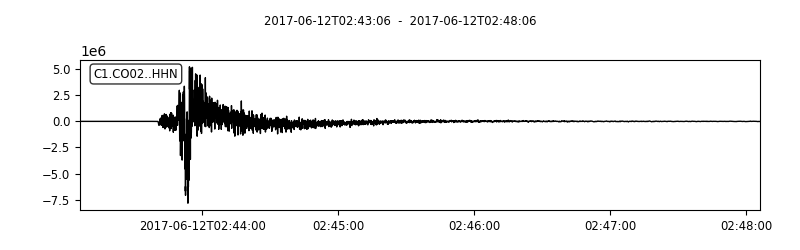

El peak o máximo del eje N: -7833525


<IPython.core.display.Javascript object>


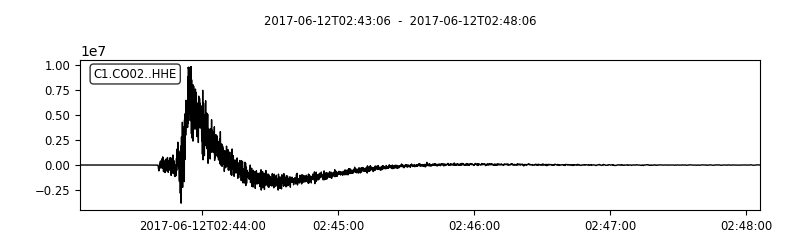

El peak o máximo del eje E: 9846835


<IPython.core.display.Javascript object>


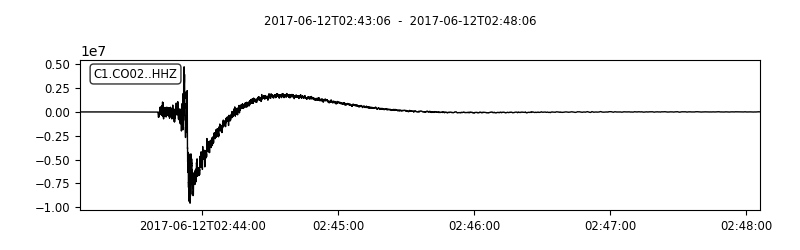

El peak o máximo del eje Z: -9578850


In [54]:
CO02_HHN.plot();
CO02N_max=int(CO02_HHN[0].max())
print(f'El peak o máximo del eje N: {CO02N_max}')

CO02_HHE.plot();
CO02E_max=int(CO02_HHE[0].max())
print(f'El peak o máximo del eje E: {CO02E_max}')

CO02_HHZ.plot();
CO02Z_max=int(CO02_HHZ[0].max())
print(f'El peak o máximo del eje Z: {CO02Z_max}')

### Espectográmas

<IPython.core.display.Javascript object>


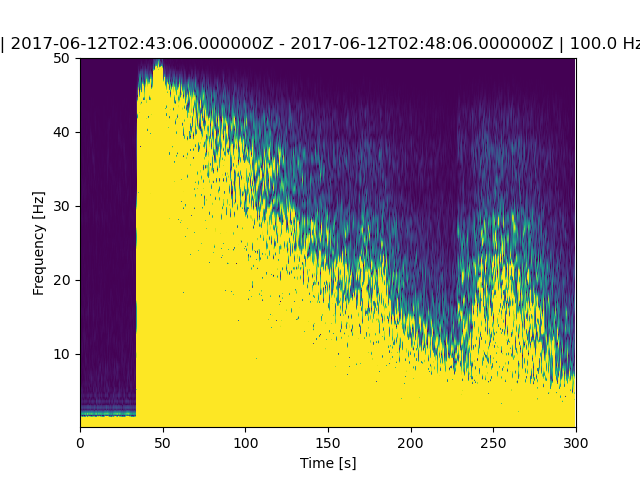

(4.1636906125464285e-06, 4952064.153721978)


In [6]:
fig = CO02_HHN[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


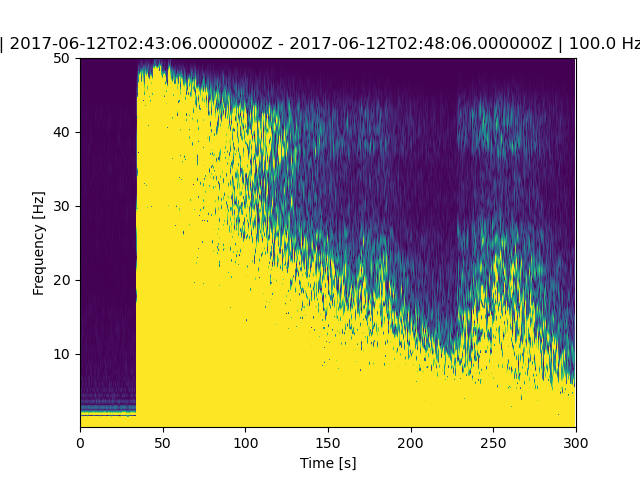

(2.535264603980174e-05, 10458764.338675702)


In [70]:
fig = CO02_HHE[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


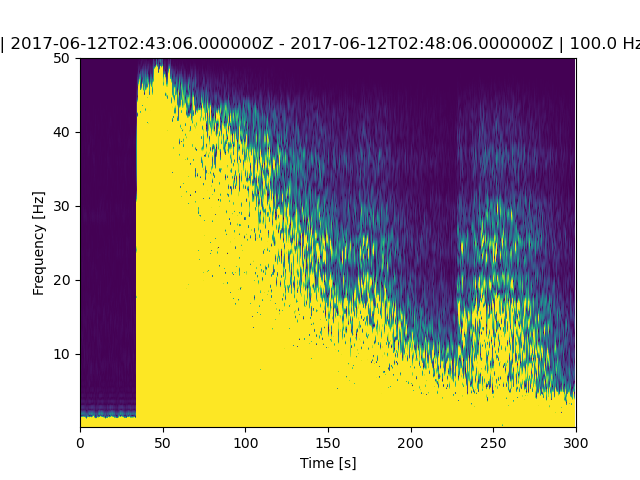

(1.6667336698635683e-05, 9931453.405819796)


In [71]:
fig = CO02_HHZ[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

## Conclusión

+ Esta estación detectó que el sismo duró 5 minutos. 
+ Podemos notar que, dentro de los máximos que tuvo el sismo, el mayor fue en el eje Este. 
+ Con respecto los espectrogramas notamos que se comportan de la misma manera en todos, sin embargo tenemos la singularidad que debajo de los $10 [hz]$ tiene una intensidad "plana" hasta los $40 [sec]$ aproximadamente que su intensidad aumenta y se va reduciendo poco a poco.

# Estación: GO03

## Direcciones de los archivos N, E, Z

In [7]:
dir_GO03_BHE = 'GO03_BHE.sac'
GO03_BHE  = read(dir_GO03_BHE, debug_headers = True)

dir_GO03_BHN = 'GO03_BHN.sac'
GO03_BHN  = read(dir_GO03_BHN, debug_headers = True)

dir_GO03_BHZ = 'GO03_BHZ.sac'
GO03_BHZ  = read(dir_GO03_BHZ, debug_headers = True)

### Datos a extraer

In [8]:
print('Fecha de inicio:')
print(GO03_BHN[0].stats.starttime)
print('Fecha de termino:')
print(GO03_BHN[0].stats.endtime)
horas_chile = (GO03_BHN[0].stats.endtime - GO03_BHN[0].stats.starttime)/60
print('El sismo leído tuvo una duración de %d minutos' % (horas_chile))

Fecha de inicio:
2017-06-12T02:43:26.000000Z
Fecha de termino:
2017-06-12T02:49:06.000000Z
El sismo leído tuvo una duración de 5 minutos


In [76]:
GO03_BHZ_evla = GO03_BHZ[0].stats.sac['evla']
GO03_BHZ_evlo = GO03_BHZ[0].stats.sac['evlo']
GO03_BHZ_evel = GO03_BHZ[0].stats.sac['evel']
GO03_BHZ_evdp = GO03_BHZ[0].stats.sac['evdp']
GO03_BHZ_mag = GO03_BHZ[0].stats.sac['mag']
GO03_BHZ_az = GO03_BHZ[0].stats.sac['az']


print(f'Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: \n \nMagnitud: {GO03_BHZ_mag} \nLatitud: {GO03_BHZ_evla} \nLongitud: {GO03_BHZ_evlo} \nAltitud: {GO03_BHZ_evel} \nProfundidad: {GO03_BHZ_evdp} \nAzimuth: {GO03_BHZ_az}')

Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: 
 
Magnitud: 5.699999809265137 
Latitud: -31.502700805664062 
Longitud: -71.74759674072266 
Altitud: -12345.0 
Profundidad: 27.0 
Azimuth: -12345.0


### Gráficos ejes N, E y Z

<IPython.core.display.Javascript object>


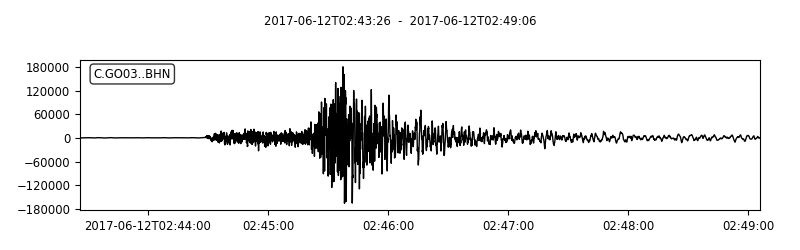

El peak o máximo del eje N: 180432


<IPython.core.display.Javascript object>


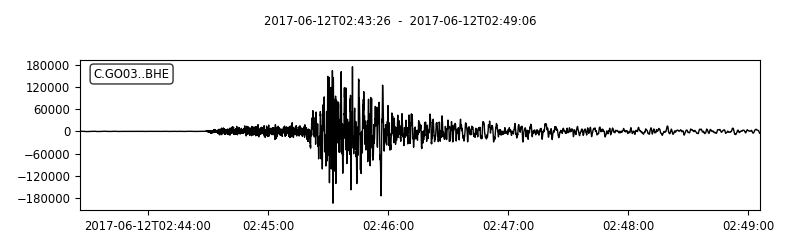

El peak o máximo del eje E: -193684


<IPython.core.display.Javascript object>


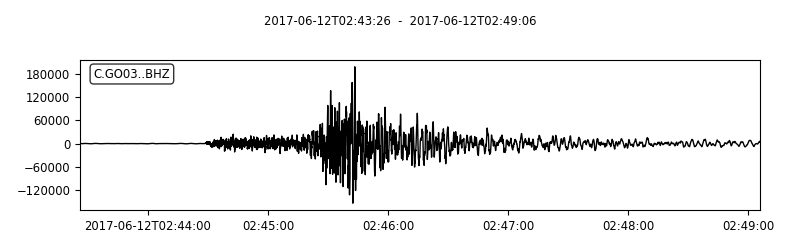

El peak o máximo del eje Z: 197340


In [52]:
GO03_BHN.plot();
GO03N_max=int(GO03_BHN[0].max())
print(f'El peak o máximo del eje N: {GO03N_max}')
GO03_BHE.plot();
GO03E_max=int(GO03_BHE[0].max())
print(f'El peak o máximo del eje E: {GO03E_max}')
GO03_BHZ.plot();
GO03Z_max=int(GO03_BHZ[0].max())
print(f'El peak o máximo del eje Z: {GO03Z_max}')

### Espectográmas ejes N,E y Z

<IPython.core.display.Javascript object>


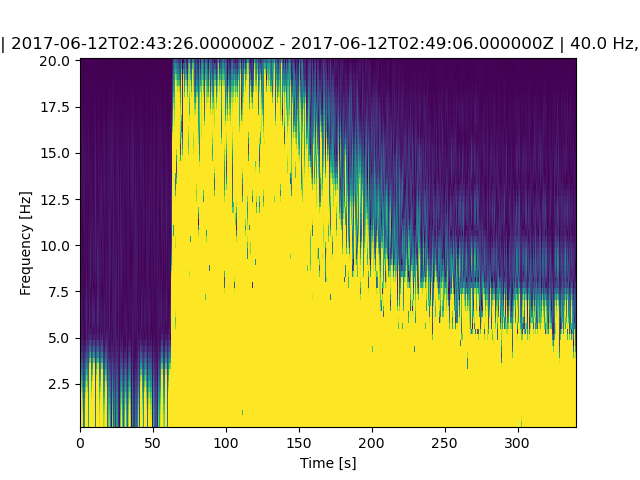

(0.00021453633635246664, 103242.26585253477)


In [10]:
fig = GO03_BHN[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


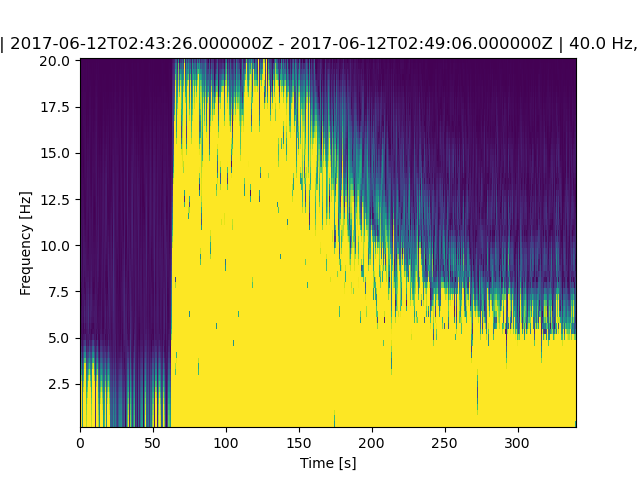

(4.1002566164631085e-05, 112811.598000921)


In [11]:
fig = GO03_BHE[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


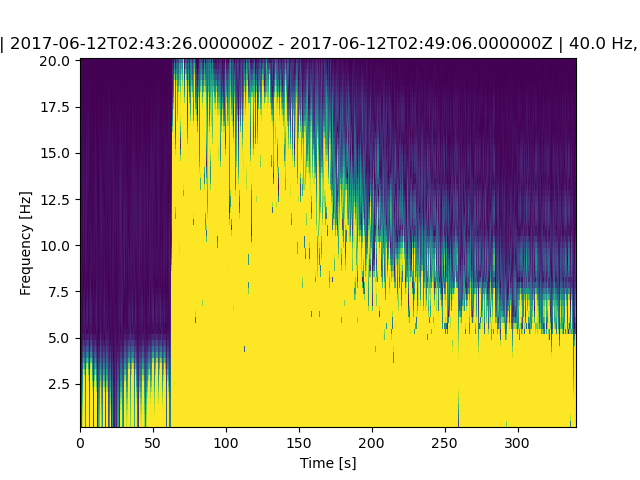

(1.831845099028821e-05, 110027.53232512597)


In [12]:
fig = GO03_BHZ[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

## Conclusión

+ En esta estación el sismo duró 5 minutos.
+ El máximo de peak o amplitud entre los diferentes ejes fue en el Z.
+ Con respecto a los espectrogramas notamos que la frecuencia máxima que alcanza el sismo es de $20 [Hz]$ aproximadamente.

# Estación: PB06

## Direcciones de los archivos N, E, Z

In [13]:
dir_PB06_HHE = 'PB06_HHE.sac'
PB06_HHE  = read(dir_PB06_HHE, debug_headers = True)

dir_PB06_HHN = 'PB06_HHN.sac'
PB06_HHN  = read(dir_PB06_HHN, debug_headers = True)

dir_PB06_HHZ = 'PB06_HHZ.sac'
PB06_HHZ  = read(dir_PB06_HHZ, debug_headers = True)

### Datos a extraer

In [14]:
print('Fecha de inicio:')
print(PB06_HHE[0].stats.starttime)
print('Fecha de termino:')
print(PB06_HHE[0].stats.endtime)
horas_chile = (PB06_HHE[0].stats.endtime - PB06_HHE[0].stats.starttime)/60
print('El sismo leído tuvo una duración de %d minutos' % (horas_chile))

Fecha de inicio:
2017-06-12T02:44:05.998393Z
Fecha de termino:
2017-06-12T02:51:05.998393Z
El sismo leído tuvo una duración de 7 minutos


In [77]:
PB06_HHZ_evla = PB06_HHZ[0].stats.sac['evla']
PB06_HHZ_evlo = PB06_HHZ[0].stats.sac['evlo']
PB06_HHZ_evel = PB06_HHZ[0].stats.sac['evel']
PB06_HHZ_evdp = PB06_HHZ[0].stats.sac['evdp']
PB06_HHZ_mag = PB06_HHZ[0].stats.sac['mag']
PB06_HHZ_az = PB06_HHZ[0].stats.sac['az']


print(f'Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: \n \nMagnitud: {PB06_HHZ_mag} \nLatitud: {PB06_HHZ_evla} \nLongitud: {PB06_HHZ_evlo} \nAltitud: {PB06_HHZ_evel} \nProfundidad: {PB06_HHZ_evdp} \nAzimuth: {PB06_HHZ_az}')  

Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: 
 
Magnitud: 5.699999809265137 
Latitud: -31.502700805664062 
Longitud: -71.74759674072266 
Altitud: -12345.0 
Profundidad: 27.0 
Azimuth: -12345.0


### Gráficos ejes N, E y Z

<IPython.core.display.Javascript object>


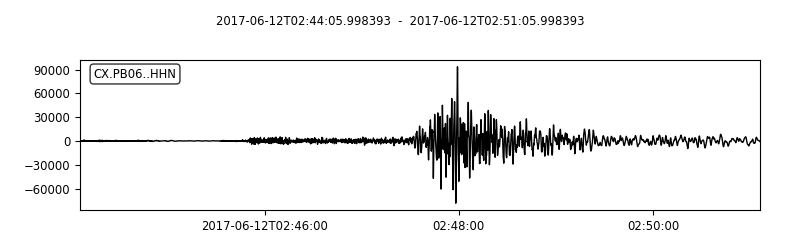

El peak o máximo del eje N: 93392


<IPython.core.display.Javascript object>


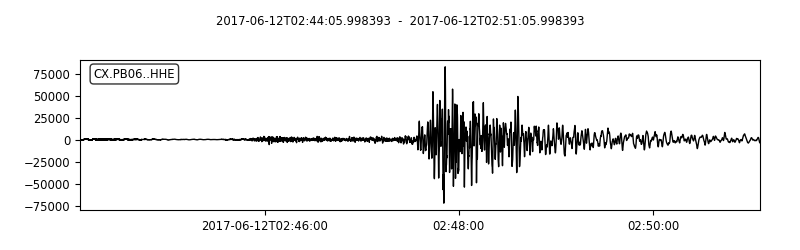

El peak o máximo del eje E: 83502


<IPython.core.display.Javascript object>


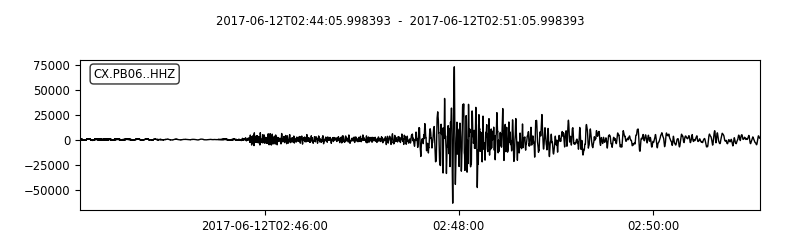

El peak o máximo del eje Z: 73142


In [55]:
PB06_HHN.plot();
PB06_HHN_max=int(PB06_HHN[0].max())
print(f'El peak o máximo del eje N: {PB06_HHN_max}')

PB06_HHE.plot();
PB06_HHE_max=int(PB06_HHE[0].max())
print(f'El peak o máximo del eje E: {PB06_HHE_max}')

PB06_HHZ.plot();
PB06_HHZ_max=int(PB06_HHZ[0].max())
print(f'El peak o máximo del eje Z: {PB06_HHZ_max}')

### Espectográmas ejes N,E y Z

<IPython.core.display.Javascript object>


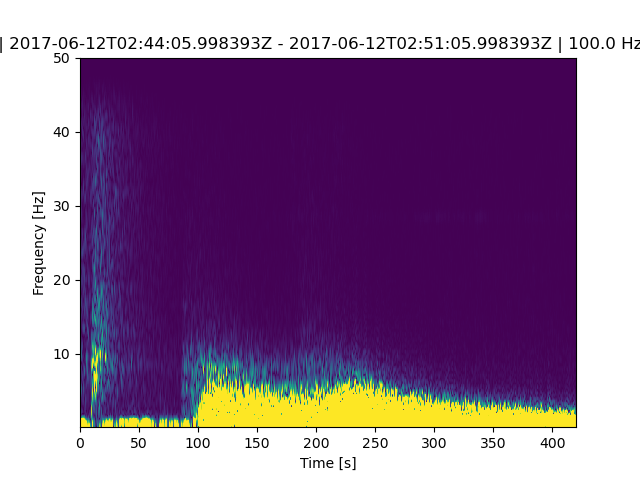

(2.370873734403698e-05, 71945.18273052355)


In [16]:
fig = PB06_HHN[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


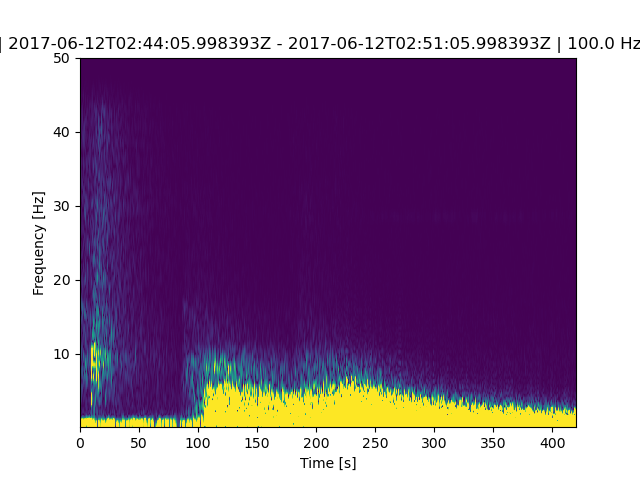

(6.433819010648874e-06, 70451.48460095495)


In [17]:
fig = PB06_HHE[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


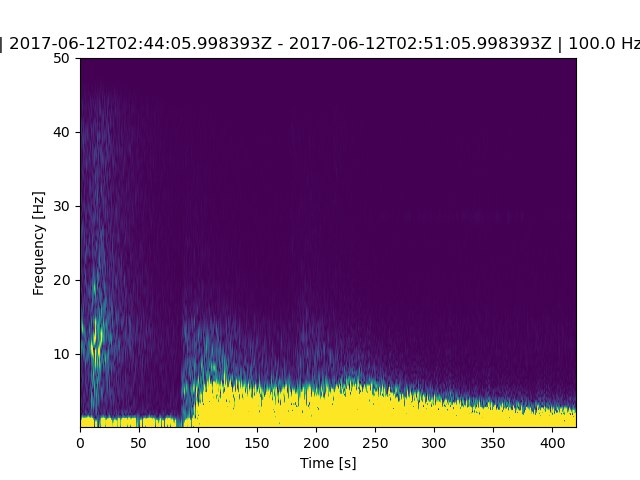

(1.510566728800345e-05, 67478.89394443938)


In [18]:
fig = PB06_HHZ[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

## Conclusión

+ El sismo en esta estación duró 7 minutos.
+ Entre los gráficos el máximo de amplitud fue en el eje Norte.
+ Con respecto al espectrograma en los diferentes ejes notamos una intensidad baja con respecto a las demás estaciones, teniendo una actividad notoria debajo de los $10 [Hz]$.

# Estación: PB09

## Direcciones de los archivos N, E, Z

In [19]:
dir_PB09_HHE = 'PB09_HHE.sac'
PB09_HHE  = read(dir_PB09_HHE, debug_headers = True)

dir_PB09_HHN = 'PB09_HHN.sac'
PB09_HHN  = read(dir_PB09_HHN, debug_headers = True)

dir_PB09_HHZ = 'PB09_HHZ.sac'
PB09_HHZ  = read(dir_PB09_HHZ, debug_headers = True)

### Datos a extraer

In [20]:
print('Fecha de inicio:')
print(PB09_HHE[0].stats.starttime)
print('Fecha de termino:')
print(PB09_HHE[0].stats.endtime)
horas_chile = (PB09_HHE[0].stats.endtime - PB09_HHE[0].stats.starttime)/60
print('El sismo leído tuvo una duración de %d minutos' % (horas_chile))

Fecha de inicio:
2017-06-12T02:44:26.000000Z
Fecha de termino:
2017-06-12T02:52:06.000000Z
El sismo leído tuvo una duración de 7 minutos


In [78]:
PB09_HHZ_evla = PB09_HHZ[0].stats.sac['evla']
PB09_HHZ_evlo = PB09_HHZ[0].stats.sac['evlo']
PB09_HHZ_evel = PB09_HHZ[0].stats.sac['evel']
PB09_HHZ_evdp = PB09_HHZ[0].stats.sac['evdp']
PB09_HHZ_mag = PB09_HHZ[0].stats.sac['mag']
PB09_HHZ_az = PB09_HHZ[0].stats.sac['az']


print(f'Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: \n \nMagnitud: {PB09_HHZ_mag} \nLatitud: {PB09_HHZ_evla} \nLongitud: {PB09_HHZ_evlo} \nAltitud: {PB09_HHZ_evel} \nProfundidad: {PB09_HHZ_evdp} \nAzimuth: {PB09_HHZ_az}') 

Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: 
 
Magnitud: 5.699999809265137 
Latitud: -31.502700805664062 
Longitud: -71.74759674072266 
Altitud: -12345.0 
Profundidad: 27.0 
Azimuth: -12345.0


### Gráficos ejes N, E y Z

<IPython.core.display.Javascript object>


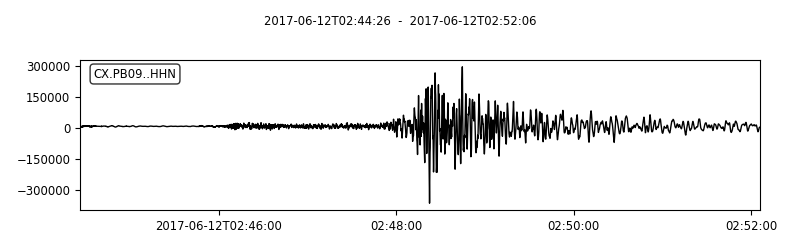

El peak o máximo del eje N: -365486


<IPython.core.display.Javascript object>


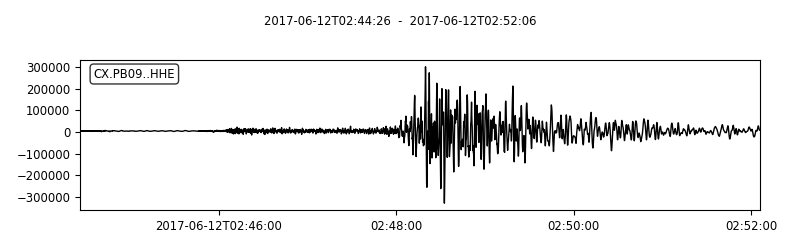

El peak o máximo del eje E: -330404


<IPython.core.display.Javascript object>


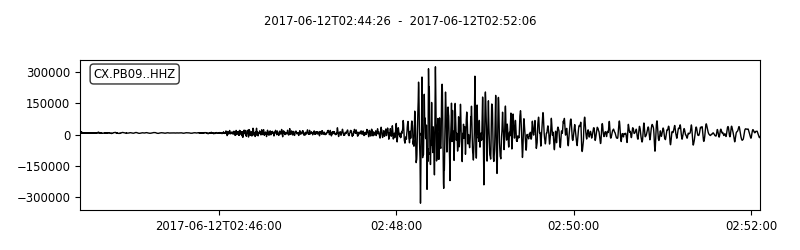

El peak o máximo del eje Z: -327503


In [56]:
PB09_HHN.plot();
PB09_HHN_max=int(PB09_HHN[0].max())
print(f'El peak o máximo del eje N: {PB09_HHN_max}')

PB09_HHE.plot();
PB09_HHE_max=int(PB09_HHE[0].max())
print(f'El peak o máximo del eje E: {PB09_HHE_max}')

PB09_HHZ.plot();
PB09_HHZ_max=int(PB09_HHZ[0].max())
print(f'El peak o máximo del eje Z: {PB09_HHZ_max}')

### Espectográmas ejes N,E y Z

<IPython.core.display.Javascript object>


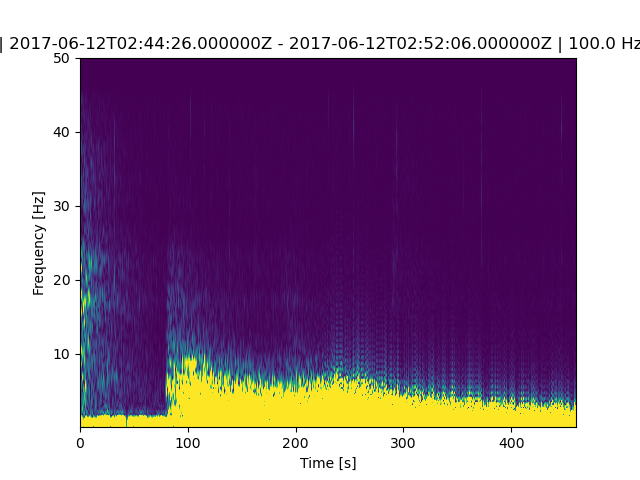

(5.707969084998352e-07, 318458.2912362591)


In [22]:
fig = PB09_HHN[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


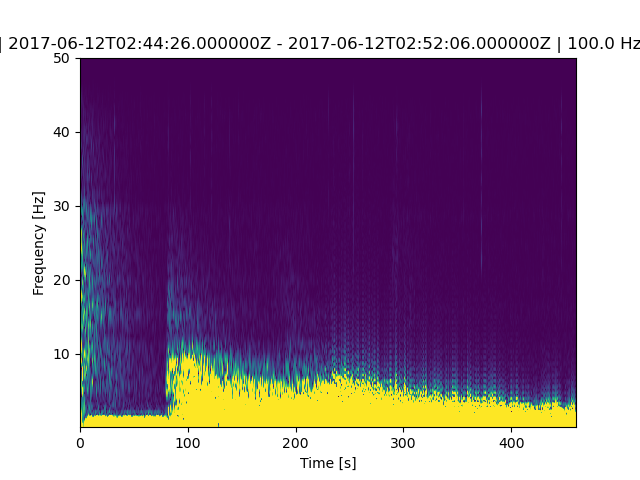

(2.7011521563494863e-05, 303629.1930368216)


In [23]:
fig = PB09_HHE[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


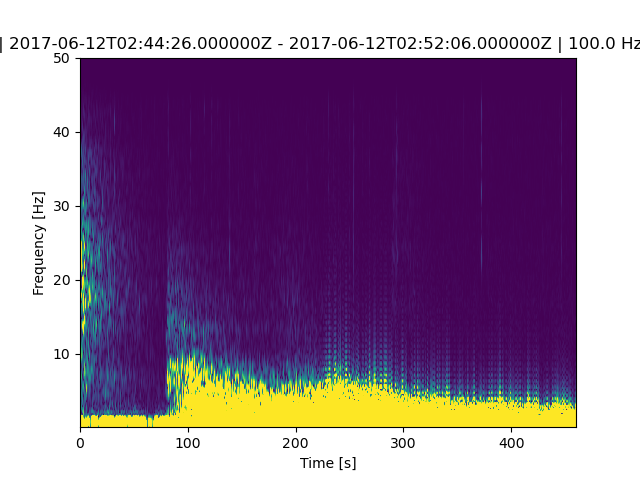

(2.3257550243886256e-05, 274092.1207879848)


In [24]:
fig = PB09_HHZ[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

## Conclusión

+ Bajo esta estación el sismo duró 7 minutos.
+ Con respecto a los gráficos notamos el eje que tuvo mayor peak fue el Norte.
+ Con respecto a los espectrogramas vemos que se comporta muy similar a la estación anterior, solamente teniendo una leve diferencia en intensidad desde los $100 [sec]$

# Estación: PB14

## Direcciones de los archivos N, E, Z

In [25]:
dir_PB14_HHE = 'PB14_HHE.sac'
PB14_HHE  = read(dir_PB14_HHE, debug_headers = True)

dir_PB14_HHN = 'PB14_HHN.sac'
PB14_HHN  = read(dir_PB14_HHN, debug_headers = True)

dir_PB14_HHZ = 'PB14_HHN.sac'
PB14_HHZ  = read(dir_PB14_HHZ, debug_headers = True)


### Datos a extraer

In [26]:
print('Fecha de inicio:')
print(PB14_HHE[0].stats.starttime)
print('Fecha de termino:')
print(PB14_HHE[0].stats.endtime)
horas_chile = (PB14_HHE[0].stats.endtime - PB14_HHE[0].stats.starttime)/60
print('El sismo leído tuvo una duración de %d minutos' % (horas_chile))

Fecha de inicio:
2017-06-12T02:43:46.000000Z
Fecha de termino:
2017-06-12T02:50:06.000000Z
El sismo leído tuvo una duración de 6 minutos


In [79]:
PB14_HHZ_evla = PB14_HHZ[0].stats.sac['evla']
PB14_HHZ_evlo = PB14_HHZ[0].stats.sac['evlo']
PB14_HHZ_evel = PB14_HHZ[0].stats.sac['evel']
PB14_HHZ_evdp = PB14_HHZ[0].stats.sac['evdp']
PB14_HHZ_mag = PB14_HHZ[0].stats.sac['mag']
PB14_HHZ_az = PB14_HHZ[0].stats.sac['az']


print(f'Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: \n \nMagnitud: {PB14_HHZ_mag} \nLatitud: {PB14_HHZ_evla} \nLongitud: {PB14_HHZ_evlo} \nAltitud: {PB14_HHZ_evel} \nProfundidad: {PB14_HHZ_evdp} \nAzimuth: {PB14_HHZ_az}')

Según los datos entregados por la estación se tiene la siguiente información sobre el sismo: 
 
Magnitud: -12345.0 
Latitud: -12345.0 
Longitud: -12345.0 
Altitud: -12345.0 
Profundidad: -12345.0 
Azimuth: -12345.0


### Gráficos ejes N, E y Z

<IPython.core.display.Javascript object>


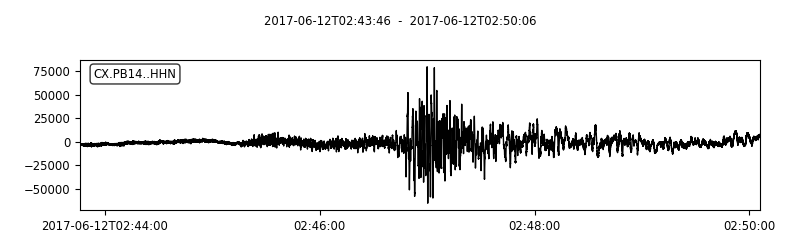

El peak o máximo del eje N: 79556


<IPython.core.display.Javascript object>


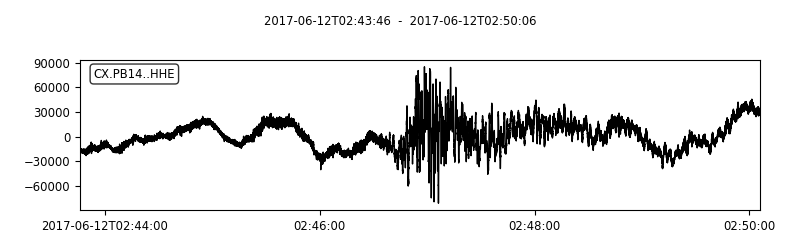

El peak o máximo del eje E: 85094


<IPython.core.display.Javascript object>


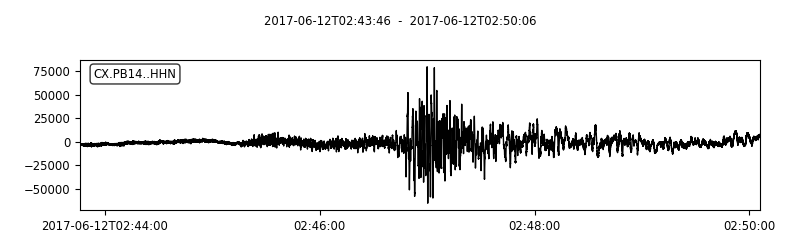

El peak o máximo del eje Z: 79556


In [57]:
PB14_HHN.plot();
PB14_HHN_max=int(PB14_HHN[0].max())
print(f'El peak o máximo del eje N: {PB14_HHN_max}')

PB14_HHE.plot();
PB14_HHE_max=int(PB14_HHE[0].max())
print(f'El peak o máximo del eje E: {PB14_HHE_max}')

PB14_HHN.plot();
PB14_HHN_max=int(PB14_HHN[0].max())
print(f'El peak o máximo del eje Z: {PB14_HHN_max}')

### Espectográmas ejes N,E y Z

<IPython.core.display.Javascript object>


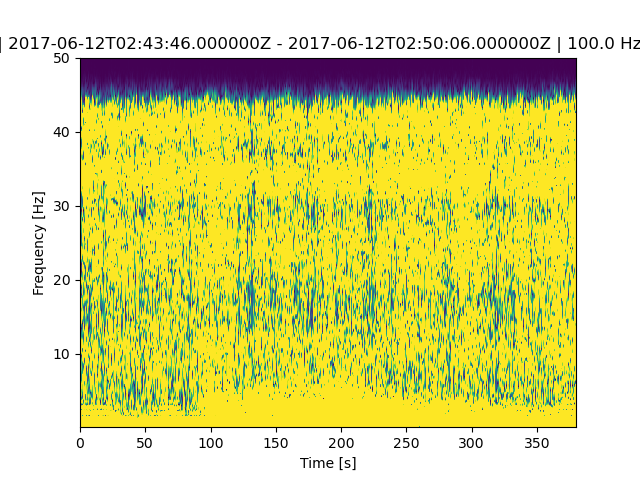

(1.685845759962174e-05, 65650.34749530823)


In [28]:
fig = PB14_HHE[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


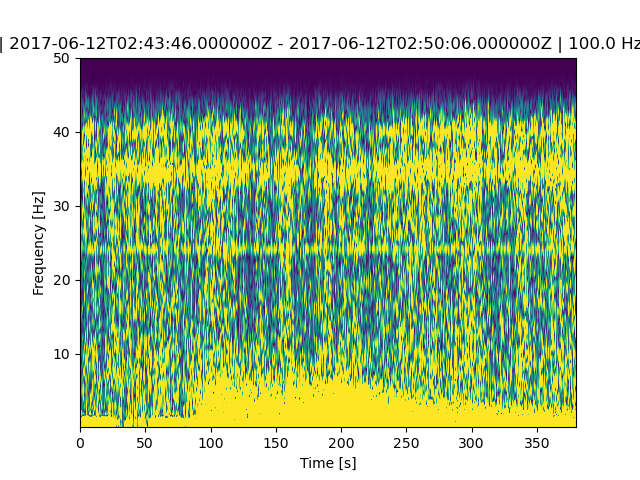

(9.691811459948016e-06, 42340.48534374078)


In [29]:
fig = PB14_HHN[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

<IPython.core.display.Javascript object>


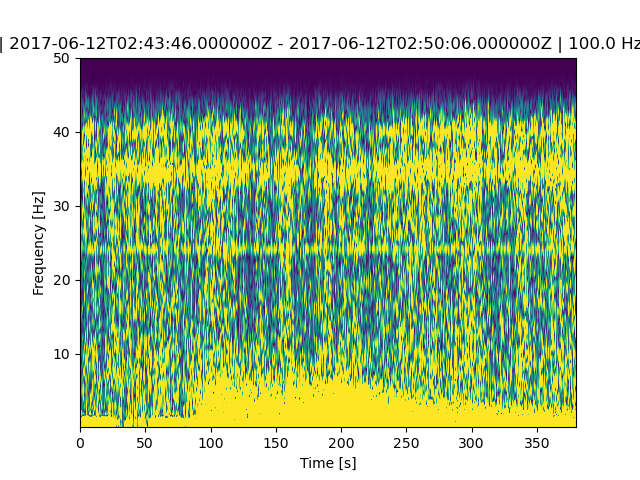

(9.691811459948016e-06, 42340.48534374078)


In [30]:
fig = PB14_HHZ[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

### Conclusión

+ Según esta estación, el sismo duró 6 minutos.
+ Con respecto a los gráficos notamos que el que tuvo un mayor peak en su amplitud fue el eje Este.
+ Con respecto a los espectrogramas, en comparación a los demás, este es el que tiene una variación más notoria en su frecuencia con respecto al tiempo pero sin sobrepasar los $50 [Hz]$.

# Resumen

De esto podemos concluír que el sismo tuvo una duración promedio de 6 minutos donde el eje Norte y Este fueron los que más magnitud tuvieron en comparación al eje Z. Finalmente destacar que la estación PB14 captó de manera más intensa las señales del sismo que las demás estaciones.

# Bibliografía

La biblioteca utilizada para analizar los datos fue obspy : https://docs.obspy.org/